In [2]:
import pandas as pd #Analysis 
import matplotlib.pyplot as plt #Visulization
import seaborn as sns #Visulization
import numpy as np #Analysis 
from scipy.stats import norm #Analysis 
from sklearn.preprocessing import StandardScaler #Analysis 
from scipy import stats #Analysis 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
import gc
from textblob import TextBlob
from nltk import word_tokenize, pos_tag, ne_chunk
import os
import string
color = sns.color_palette()
import spacy
import re
from nltk.tokenize import RegexpTokenizer
%matplotlib inline

from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

from sklearn import model_selection, preprocessing, metrics, ensemble, naive_bayes, linear_model
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD

import nltk
from nltk.tokenize import word_tokenize
from textblob import TextBlob, Word
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from collections import defaultdict
from nltk import FreqDist
import copy
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [3]:
data1 = pd.read_csv('C:/Users/91812/Desktop/college/Final Year/archive/drugsComTrain_raw.csv')
data2 = pd.read_csv('C:/Users/91812/Desktop/college/Final Year/archive/drugsComTest_raw.csv')

In [4]:
df_all = pd.concat([data1,data2])
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215063 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     215063 non-null  int64 
 1   drugName     215063 non-null  object
 2   condition    213869 non-null  object
 3   review       215063 non-null  object
 4   rating       215063 non-null  int64 
 5   date         215063 non-null  object
 6   usefulCount  215063 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 13.1+ MB


In [5]:
df_all = df_all.dropna(axis=0)

In [6]:
print("unique values count of all : " ,len(set(df_all['uniqueID'].values)))
print("length of all : " ,df_all.shape[0])

unique values count of all :  213869
length of all :  213869


In [7]:
df_all=df_all.drop(['uniqueID'], axis=1)
df_all=df_all.drop(['date'], axis=1)

Text(0.5, 1.0, 'Top20 : The number of drugs per condition.')

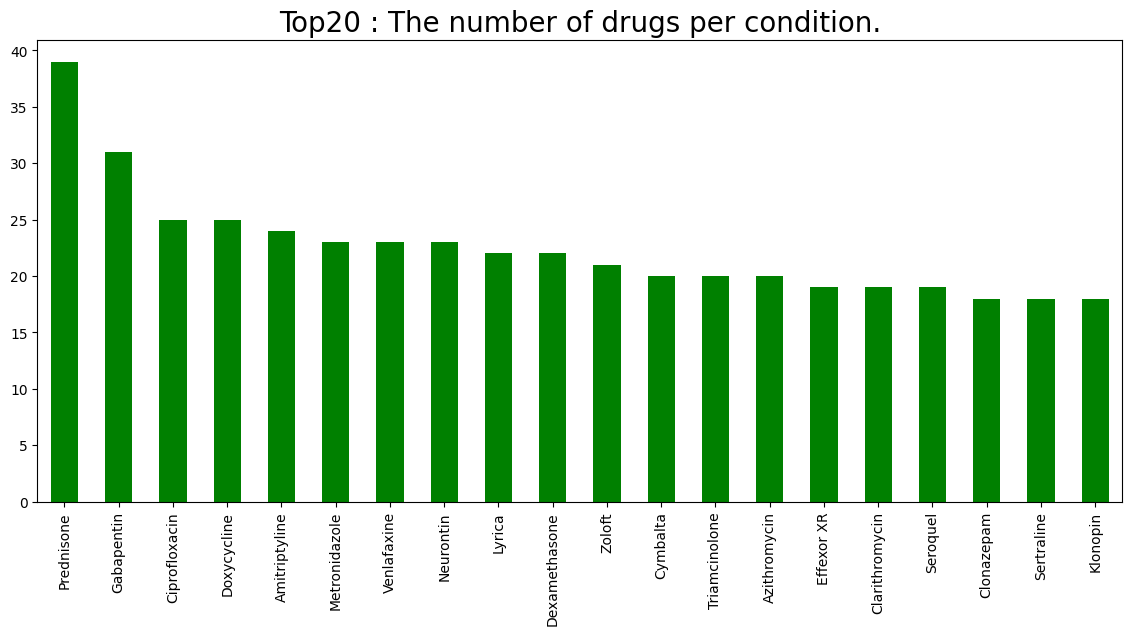

In [8]:
condition_dn = df_all.groupby(['drugName'])['condition'].nunique().sort_values(ascending=False)
condition_dn[0:20].plot(kind="bar", figsize = (14,6), fontsize = 10,color="green")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Top20 : The number of drugs per condition.", fontsize = 20)

In [9]:
print('data before:')
print(df_all.shape)
df_all=df_all[~df_all.condition.str.contains("</span>", na=False)]
df_all=df_all[df_all['condition']!='Not Listed / Othe']
print('data after:')
print(df_all.shape)

data before:
(213869, 5)
data after:
(212106, 5)


Text(0.5, 1.0, 'Top20 : The number of drugs per condition.')

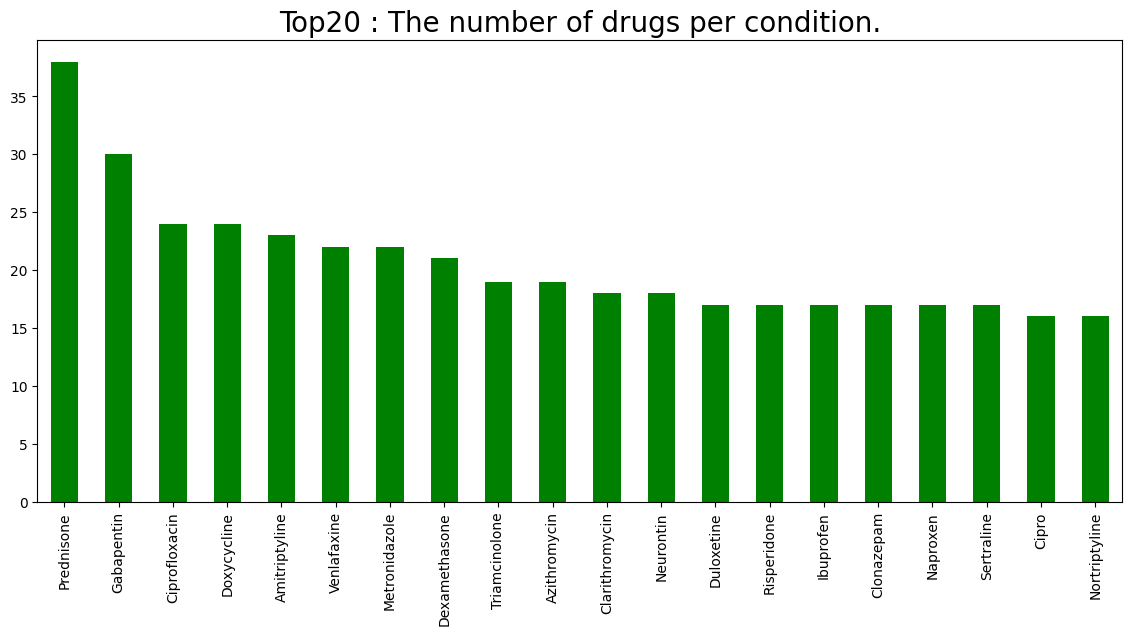

In [10]:
condition_dn = df_all.groupby(['drugName'])['condition'].nunique().sort_values(ascending=False)
condition_dn[0:20].plot(kind="bar", figsize = (14,6), fontsize = 10,color="green")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Top20 : The number of drugs per condition.", fontsize = 20)

In [11]:
df_all=df_all[df_all['condition'].isin(['Acne','Pain','Anxiety' , 'Insomnia' , 'ADHD'])]

In [12]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32905 entries, 1 to 53764
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   drugName     32905 non-null  object
 1   condition    32905 non-null  object
 2   review       32905 non-null  object
 3   rating       32905 non-null  int64 
 4   usefulCount  32905 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.5+ MB


In [13]:
import numpy as np
from itertools import chain

# return list from series of comma-separated strings
def chainer(s):
    return list(chain.from_iterable(s.str.split('/')))

# calculate lengths of splits
lens = df_all['drugName'].str.split('/').map(len)

# create new dataframe, repeating or chaining as appropriate
res = pd.DataFrame({'review': np.repeat(df_all['review'], lens),
                    'rating': np.repeat(df_all['rating'], lens),
                    'usefulCount': np.repeat(df_all['usefulCount'], lens),
                    'condition': np.repeat(df_all['condition'], lens),
                    'drugName': chainer(df_all['drugName'])})

res

,review,rating,usefulCount,condition,drugName
1,"""My son is halfway through his fourth week of ...",8,192,ADHD,Guanfacine
21,"""I have insomnia, it&#039;s horrible. My story...",10,43,Insomnia,Trazodone
27,"""Hi all, My son who is 12 was diagnosed when h...",10,11,ADHD,Daytrana
32,"""I am 30 years old. I had a multiple composite...",10,16,Pain,Toradol
37,"""I have been on morphine for at least 7 years....",8,19,Pain,Morphine
...,...,...,...,...,...
53742,"""Have been taking it for 6 years (120 milligra...",10,16,Pain,Methadone
53753,"""Diagnosed with general anxiety disorder. Wou...",10,123,Anxiety,BuSpar
53756,"""Treatment for ADHD save my life. Don&#039;t b...",10,36,ADHD,Dextroamphetamine
53762,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,11,Anxiety,Escitalopram


In [14]:
res['drugName'].value_counts().nlargest(10)

Acetaminophen       1092
Isotretinoin         682
Escitalopram         669
Clonazepam           631
Zolpidem             623
Trazodone            578
Gabapentin           562
Alprazolam           560
Tramadol             552
Lisdexamfetamine     548
Name: drugName, dtype: int64

In [15]:
res=res[res['drugName'].isin(['Acetaminophen','Isotretinoin','Escitalopram','Clonazepam' , 'Zolpidem  ' , 'Trazodone ' ,'Gabapentin' , 'Alprazolam','Tramadol' , 'Lisdexamfetamine' ])]

In [16]:
res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4231 entries, 109 to 53762
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review       4231 non-null   object
 1   rating       4231 non-null   int64 
 2   usefulCount  4231 non-null   int64 
 3   condition    4231 non-null   object
 4   drugName     4231 non-null   object
dtypes: int64(2), object(3)
memory usage: 198.3+ KB


In [17]:
res.head()

,review,rating,usefulCount,condition,drugName
109,"""I just started this medication on April 1st a...",7,10,Acne,Isotretinoin
193,"""Changed my life completely, I can actually fu...",10,4,Anxiety,Alprazolam
250,"""I have been on Vyvanse for almost 2 years and...",10,65,ADHD,Lisdexamfetamine
252,"""Day 2. Taking for major anxiety/ slight depre...",10,11,Anxiety,Escitalopram
253,"""I have a spinal cord injury. I&#039;m 7 years...",6,22,Pain,Gabapentin


In [18]:
res =res.drop(['rating' , 'usefulCount'] , axis=1)

In [19]:
def clean_condition(review):
    # Convert to lowercase
    review = review.lower()
    
    # Remove punctuation
    review = review.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize the review
    tokens = nltk.word_tokenize(review)
    
    # Remove stop words
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    
    # Join the cleaned tokens back together
    cleaned_condition = ' '.join(tokens)
    
    return cleaned_condition

In [20]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
res['condition'] = res['condition'].apply(lambda x: clean_condition(x))

In [21]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
res['condition'] = labelencoder.fit_transform(res['condition'])
res

labelencoder1 = LabelEncoder()
res['drugName'] = labelencoder1.fit_transform(res['drugName'])
res

,review,condition,drugName
109,"""I just started this medication on April 1st a...",0,5
193,"""Changed my life completely, I can actually fu...",2,1
250,"""I have been on Vyvanse for almost 2 years and...",1,6
252,"""Day 2. Taking for major anxiety/ slight depre...",2,3
253,"""I have a spinal cord injury. I&#039;m 7 years...",4,4
...,...,...,...
53657,"""Gabapentin is the most liberating medicine I ...",2,4
53686,"""I was in car accident, brain damage, 10 years...",2,1
53700,"""I&#039;m 51-years old and was skeptical regar...",1,6
53714,"""I&#039;m a 22 year old male with a horrible c...",1,6


In [22]:
res['review'] = res['review'].str.replace('\d+', '')

In [23]:
# res.to_csv('trial.csv')

In [23]:
res['drugName'].value_counts()

5    682
3    669
2    631
4    562
1    560
7    552
6    548
0     27
Name: drugName, dtype: int64

In [24]:
res['condition'].value_counts()

2    2068
4     767
0     682
1     548
3     166
Name: condition, dtype: int64